# Demo of map module  
* acts as a wrapper around `basemap` to reduce the input requirements (reads them from a shapefile instead)
* needs to be ported over to `cartopy`  
* has not be comprehensively tested to work on any coordinate system (example below is in Albers meters, should also work in UTM)

In [1]:
import sys
path = 'D:/ATLData/Documents/GitHub'
#path = '/Users/aleaf/Documents/GitHub'
import os
import copy
import numpy as np
import pandas as pd
sys.path.insert(0, path + '/Figures')
sys.path.append(path + '/GSFLOW_climate_utils')
sys.path.append(path + '/GSFLOW_climate_utils/preprocessing')
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from Figures import ReportFigures, basemap
from GISio import shp2df, df2shp
import flopy

%matplotlib inline

rf = ReportFigures()
rf.set_style()

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.it'] = 'Univers 67 Condensed:italic'

extent = [500000, 2290000, 680000, 2560000]
projection_shapefile='data/hrus.shp'
parallels=[43,44,45, 46]
meridians=[-89,-88,-87]
tick_interval=1

counties_shp = '../Figures/shps/bound_cnty_24k/county_bnds.shp'
lakemichigan = '../Figures/shps/GL/LakeMichigan.shp'
hrus = 'data/hrus.shp'

label = 'Growing Season, in days'

change_label = 'Change in growing season, in days'

          
basemap_credit = "Base from the Wisconsin Department of Natural Resources\ndigital data, 2004, 1:24,000\n" \
                 "and National Hydrography Dataset (NHDPlusV2), 2012.\n" \
                 "Standard parallels 29$^\circ$30'N and 45$^\circ$30'N,\n" \
                 "Central meridian 96$^\circ$W, Latitude of orgin 23$^\circ$00'N'"

### Read in data describing change in growing season for each hru  
* changes are in days for the years 2046 and 2081, compared to late 1990s

In [2]:
df = pd.read_csv('data/Change_in_growing_season.csv', index_col=0)
df.head()

,gs2046,gs2081
1,23.958032,38.760889
2,22.647942,37.406513
3,23.610819,37.999391
4,22.302298,36.976583
5,23.902238,38.553666


### Set up a map with some base layers


reading ../Figures/shps/bound_cnty_24k/county_bnds.shp...
--> building dataframe... (may take a while for large shapefiles)
building PatchCollection...

reading ../Figures/shps/GL/LakeMichigan.shp...
--> building dataframe... (may take a while for large shapefiles)
building PatchCollection...


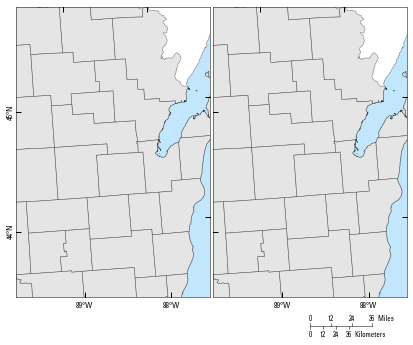

In [3]:
Map = basemap(extent=extent, projection_shapefile=projection_shapefile,
              parallels=parallels, meridians=meridians,
              subplots=(1,2),
              tick_interval=tick_interval)

# add a scale bar
Map.add_scalebar(loc=(.5, -.1))

# add some base layers via shapefiles
counties = Map.add_shapefile(counties_shp, alpha=0.5)
lm = Map.add_shapefile(lakemichigan, fc='LightSkyBlue')

### add some credits

C:\Users\aleaf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\mathtext.py:857: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


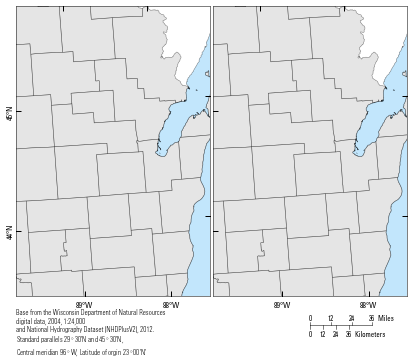

In [4]:
rf.basemap_credits(Map.axes.flat[0], basemap_credit, wrap=None, y_offset=-0.05)
Map.fig

### plot the change in growing season data  
* data are indexed to the shapefile via the numbers in the nhru attribute field  
* the `normalize_cmap` argument is meant to accurately display positive or negative change with a diverging colormap (such as `coolwarm`. In this case, 0 is set at the center of the colormap, so negative changes would be displayed in blues.


reading data/hrus.shp...
--> building dataframe... (may take a while for large shapefiles)
building PatchCollection...
0.7537924585711097 0.7538924585711096 1.0


C:\Users\aleaf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\mathtext.py:857: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


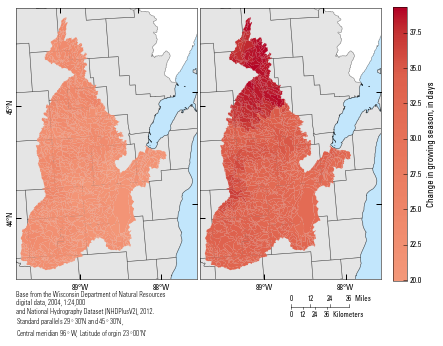

In [5]:
Map.make_patches('data/hrus.shp', index_field='nhru', layername='hrus')
Map.plot_patches(layername='hrus', color_fields=df.columns.tolist(), 
                 fc='0.5', lw=0, ec=None, alpha=1, 
                 cmap='coolwarm',
                 clim=(),
                 normalize_cmap=True,
                 cbar=True, df=df,
                 cbar_kw={'fraction': 0.035,
                          'label': change_label})
Map.fig

### Add subplot titles

C:\Users\aleaf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\mathtext.py:857: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


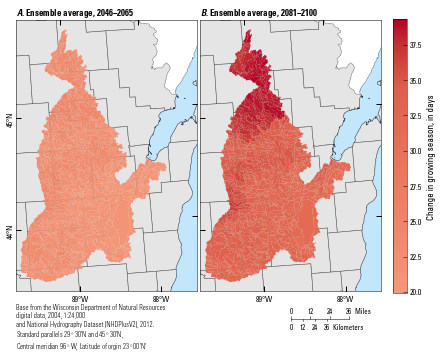

In [6]:
titles = {
          0: 'AEnsemble average, 2046-2065',
          1: 'BEnsemble average, 2081-2100'}

for i, ax in enumerate(Map.axes.flat):
    prefix, title = titles[i][0], titles[i][1:]
    rf.title(ax, title, zorder=200, wrap=50,
             subplot_prefix=prefix,
             capitalize=False)
Map.fig

### without colormap normalization  
* colormap is simply scaled between min and max data values


reading ../Figures/shps/bound_cnty_24k/county_bnds.shp...
--> building dataframe... (may take a while for large shapefiles)
building PatchCollection...

reading ../Figures/shps/GL/LakeMichigan.shp...
--> building dataframe... (may take a while for large shapefiles)
building PatchCollection...

reading data/hrus.shp...
--> building dataframe... (may take a while for large shapefiles)
building PatchCollection...


C:\Users\aleaf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\mathtext.py:857: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


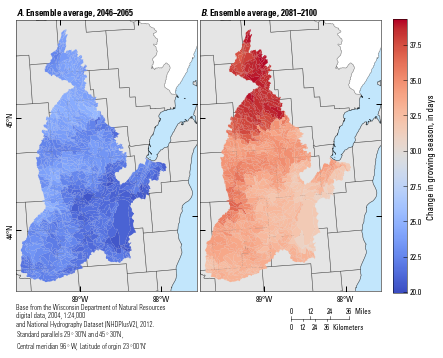

In [10]:
Map = basemap(extent=extent, projection_shapefile=projection_shapefile,
              parallels=parallels, meridians=meridians,
              subplots=(1,2),
              tick_interval=tick_interval)

# add a scale bar
Map.add_scalebar(loc=(.5, -.1))

# add some base layers via shapefiles
counties = Map.add_shapefile(counties_shp, alpha=0.5)
lm = Map.add_shapefile(lakemichigan, fc='LightSkyBlue')
rf.basemap_credits(Map.axes.flat[0], basemap_credit, wrap=None, y_offset=-0.05)
Map.make_patches('data/hrus.shp', index_field='nhru', layername='hrus')
Map.plot_patches(layername='hrus', color_fields=df.columns.tolist(), 
                 fc='0.5', lw=0, ec=None, alpha=1, 
                 cmap='coolwarm',
                 clim=(),
                 normalize_cmap=False,
                 cbar=True, df=df,
                 cbar_kw={'fraction': 0.035,
                          'label': change_label})

titles = {
          0: 'AEnsemble average, 2046-2065',
          1: 'BEnsemble average, 2081-2100'}

for i, ax in enumerate(Map.axes.flat):
    prefix, title = titles[i][0], titles[i][1:]
    rf.title(ax, title, zorder=200, wrap=50,
             subplot_prefix=prefix,
             capitalize=False)

#### default figsize is for a double column figure

In [11]:
Map.figsize

(7.0, 6.125)

#### export to pdf

In [12]:
Map.fig.savefig('map.pdf')

C:\Users\aleaf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\mathtext.py:857: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
